# Facial Expression Recognition

## Initialisation

In [2]:
!pip install fastai
from fastai.vision.all import *

  Using cached fastai-2.7.12-py3-none-any.whl (233 kB)
  Using cached fastdownload-0.0.7-py3-none-any.whl (12 kB)
  Using cached fastcore-1.5.29-py3-none-any.whl (67 kB)
  Using cached torchvision-0.15.2-cp311-cp311-macosx_11_0_arm64.whl (1.4 MB)
  Using cached matplotlib-3.7.2-cp311-cp311-macosx_11_0_arm64.whl (7.3 MB)
  Using cached pandas-2.0.3-cp311-cp311-macosx_11_0_arm64.whl (10.7 MB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached PyYAML-6.0.1-cp311-cp311-macosx_11_0_arm64.whl (167 kB)
  Using cached fastprogress-1.0.3-py3-none-any.whl (12 kB)
  Using cached Pillow-10.0.0-cp311-cp311-macosx_11_0_arm64.whl (3.1 MB)
  Using cached scikit_learn-1.3.0-cp311-cp311-macosx_12_0_arm64.whl (9.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.6/29.6 MB 7.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 1.9 MB/s eta 0:00:0000:0100:010m
  Using cached torch-2.0.1-cp311-none-macosx_11_0_arm64.whl (55.8 MB)
  Using cached spacy_

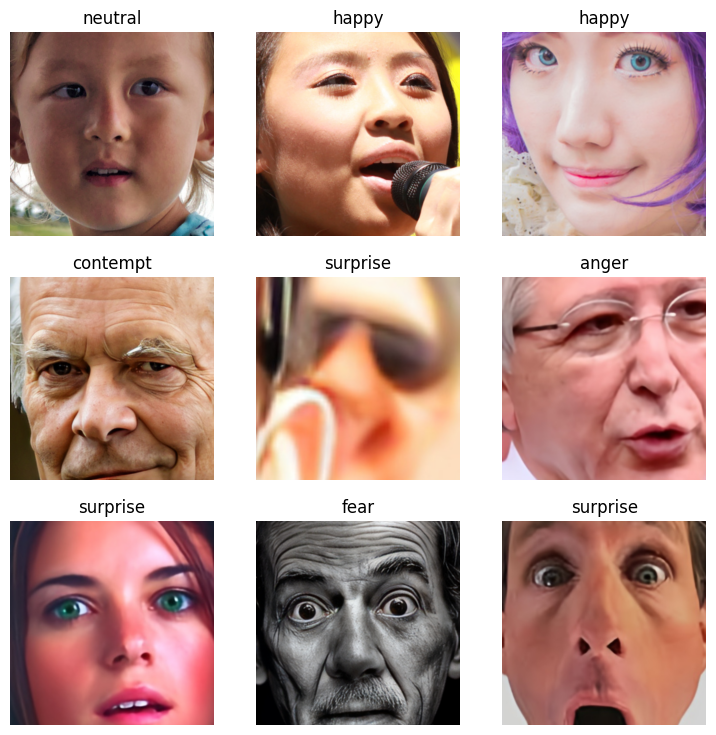

In [9]:
# Define the path
path = Path("DATA/train/images")
label_path = Path("DATA/train/labels")

# Map numbers to labels
expressions = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Create a dictionary of labels
labels_dict = {}
for txt_file in label_path.glob('*.txt'):
    with open(txt_file) as f:
        content = f.read().strip().split()
        label_index = int(content[0]) # Assuming the class is the first element in the file
        label = expressions[label_index]
        filename = txt_file.stem # Filename without extension
        labels_dict[filename] = label

# Define the labeling function
def label_func(filepath):
    filename = filepath.stem
    return labels_dict.get(filename, 'unknown') # Return 'unknown' if the filename is not found in the dictionary

# Gather the file paths
files = get_image_files(path)

# Define any data augmentation or preprocessing
item_tfms = Resize(460)
batch_tfms = aug_transforms(size=224)

# Create the ImageDataLoaders object
faces = ImageDataLoaders.from_path_func(
    path, files, label_func, 
    item_tfms=item_tfms, 
    #! this will not run on m1 mac
    # batch_tfms=batch_tfms
)

faces.show_batch()

In [ ]:
# create a learner
# check the data
# refine
# export the model